In [8]:
import pandas as pd
import numpy as np
import missingno as msno

In [19]:
train_dataset = pd.read_csv("Data/train.csv")
train_dataset.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [20]:
train_dataset.shape

(15000, 70)

In [21]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

- nerdiness : 괴짜 / 0 or 1

In [22]:
train_dataset.describe()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,...,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,...,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,...,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,11249.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,14999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


<AxesSubplot:>

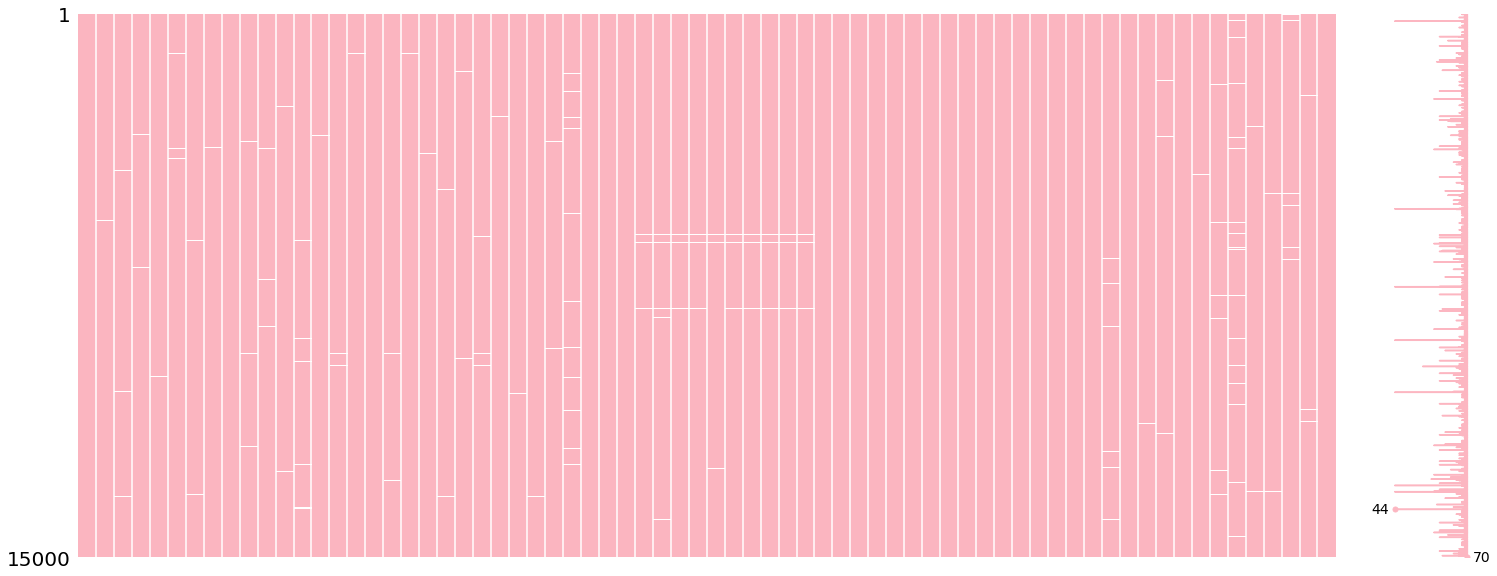

In [23]:
msno.matrix(train_dataset.iloc[:, :], color = (0.988, 0.713, 0.756))

In [24]:
print("education : ", train_dataset['education'].unique())
print("urban : ", train_dataset['urban'].unique())
print("gender : ", train_dataset['gender'].unique())
print("engnat : ", train_dataset['engnat'].unique())
print("age : ", train_dataset['age'].unique())
print("hand : ", train_dataset['hand'].unique())
print("religion : ", train_dataset['religion'].unique())
print("orientation : ", train_dataset['orientation'].unique())
print("voted : ", train_dataset['voted'].unique())
print("married : ", train_dataset['married'].unique())
print("familysize : ", train_dataset['familysize'].unique())
print("ASD : ", train_dataset['ASD'].unique())
print("nerdiness : ", train_dataset['nerdiness'].unique())

education :  [ 2.  4.  1.  3. nan]
urban :  [1 2 3 0]
gender :  [ 3.  2.  1. nan]
engnat :  [ 1.  2. nan]
age :  [   20    49    43    17    18    26    40    34    29    24    13    14
    16    19    15    23    32    22    25    27    33    41    21    50
    64    44    31    35    67    48    38    46    58    59    52    42
    37    55    36    45    28    47    30    39    54    53    69    57
    72    51    56    65    60    61   100    66    73    70    68   123
    62    71    78    76    63   545    74    88   722 38822    75    77
    99    81   336    80]
hand :  [ 2.  1.  3. nan]
religion :  [12.  2.  1.  7. 10.  3.  4.  6.  9.  5.  8. nan 11.]
orientation :  [ 4.  1.  2.  5. nan  3.]
voted :  [ 2.  1. nan]
married :  [ 1.  2.  3. nan]
familysize :  [4.000e+00 2.000e+00 1.000e+00 3.000e+00 5.000e+00       nan 8.000e+00
 6.000e+00 2.300e+01 1.300e+01 7.000e+00 2.919e+03 1.000e+01 3.900e+01
 9.000e+00 1.200e+01 1.400e+01 1.900e+01 1.600e+01 1.100e+01 1.700e+01]
ASD :  [ 2